<a href="https://colab.research.google.com/github/DoshikRahul/IIITH-AIML/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Prorgam on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [20]:
X = 10 * np.random.rand(50, 1)
y = 15 + 18 * X + np.random.randn(50, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

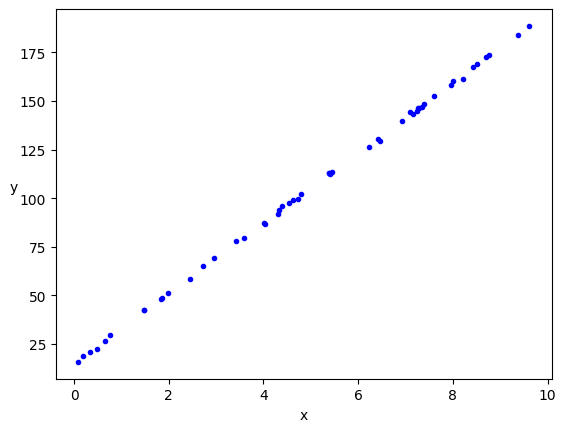

In [21]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [29]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / (2*m)) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [30]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [34]:
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2*m)) * np.sum(np.square(predictions - y))  # fixed formula
    return cost

def gradient_descent(X, y, y_pred, learning_rate=0.1, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, len(y_pred)))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it, :] = y_pred.T
        cost_history[it] = cal_cost(y_pred, X, y)

        if np.isnan(cost_history[it]) or np.isinf(cost_history[it]):
            print(f"Stopped early at iteration {it} due to instability.")
            break

    return y_pred, cost_history, y_pred_history


# ----------------------------
# Main script
# ----------------------------
# 1. Scale X (important for lr=0.1)
X_scaled = (X - np.mean(X)) / np.std(X)
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

# 2. Run gradient descent
lr = 0.1
n_iter = 1000
y_pred = np.random.randn(2,1)

y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('Scaled coefficients:')
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

# 3. Convert back to original scale
slope_real = y_pred[1][0] / np.std(X)
intercept_real = y_pred[0][0] - slope_real * np.mean(X)
print(f"\nRecovered intercept: {intercept_real:.3f}, slope: {slope_real:.3f}")


Scaled coefficients:
y_pred[0]: 105.149
y_pred[1]: 49.467
Final error: 0.329

Recovered intercept: 15.218, slope: 18.015


In [35]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


slope_real = y_pred[1][0] / np.std(X)
intercept_real = y_pred[0][0] - slope_real * np.mean(X)
print(f"\nRecovered intercept: {intercept_real:.3f}, slope: {slope_real:.3f}")

y_pred[0]: 14.065
y_pred[1]: 18.194
Final error: 0.484

Recovered intercept: -19.012, slope: 6.626


In [37]:
lr = 0.001
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


slope_real = y_pred[1][0] / np.std(X)
intercept_real = y_pred[0][0] - slope_real * np.mean(X)
print(f"\nRecovered intercept: {intercept_real:.3f}, slope: {slope_real:.3f}")

y_pred[0]: 4.686
y_pred[1]: 19.646
Final error: 13.213

Recovered intercept: -31.030, slope: 7.155


Plotting the error vs Number of iterations

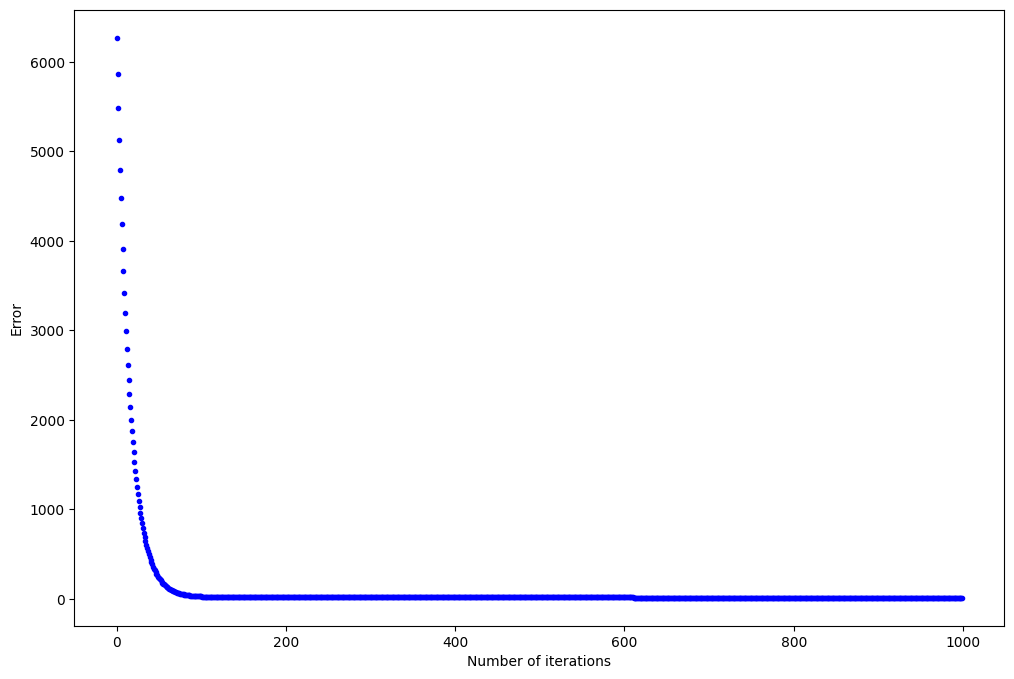

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

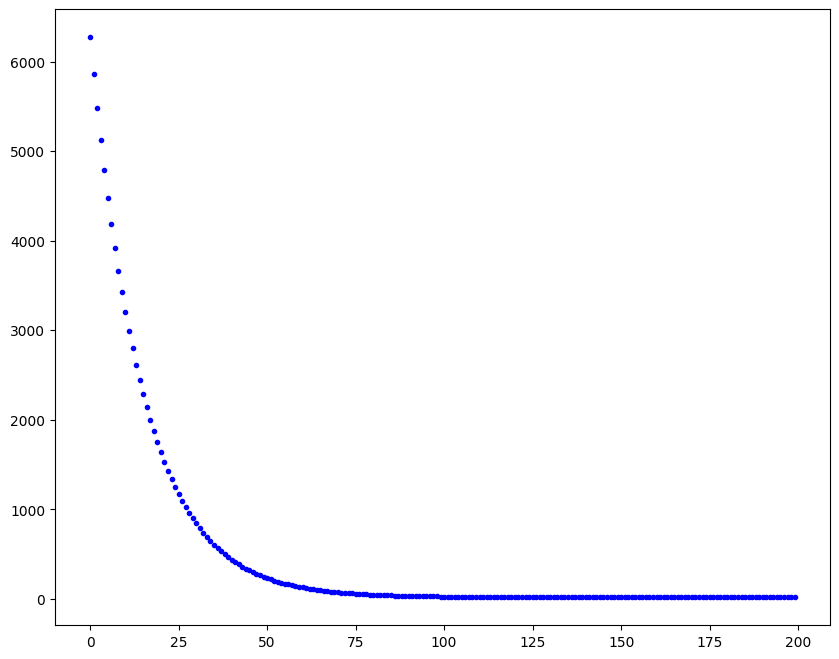

In [39]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


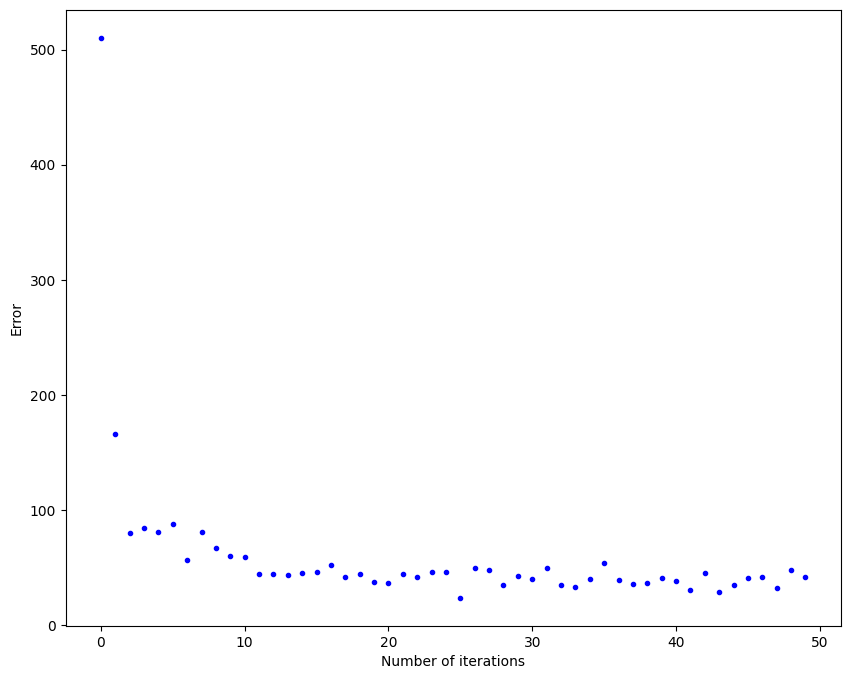

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [49]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.001, iterations=10000):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [50]:
lr = 0.05
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 8.101
y_pred[1]: 19.117
Final error: 271.143


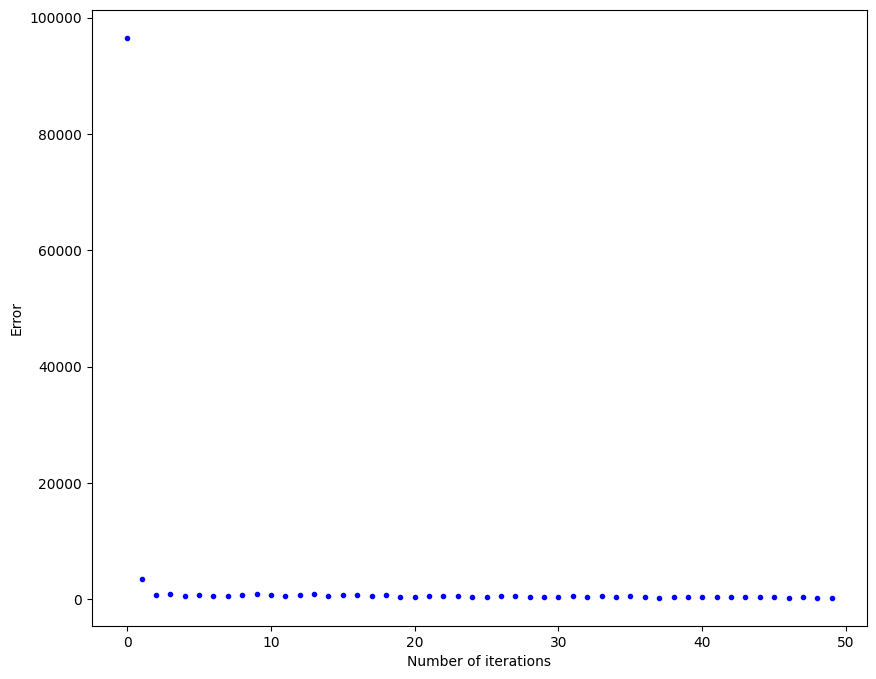

In [51]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [46]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.1, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [47]:
lr = 0.005
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.392
y_pred[1]: 19.850
Final error: 1046.633


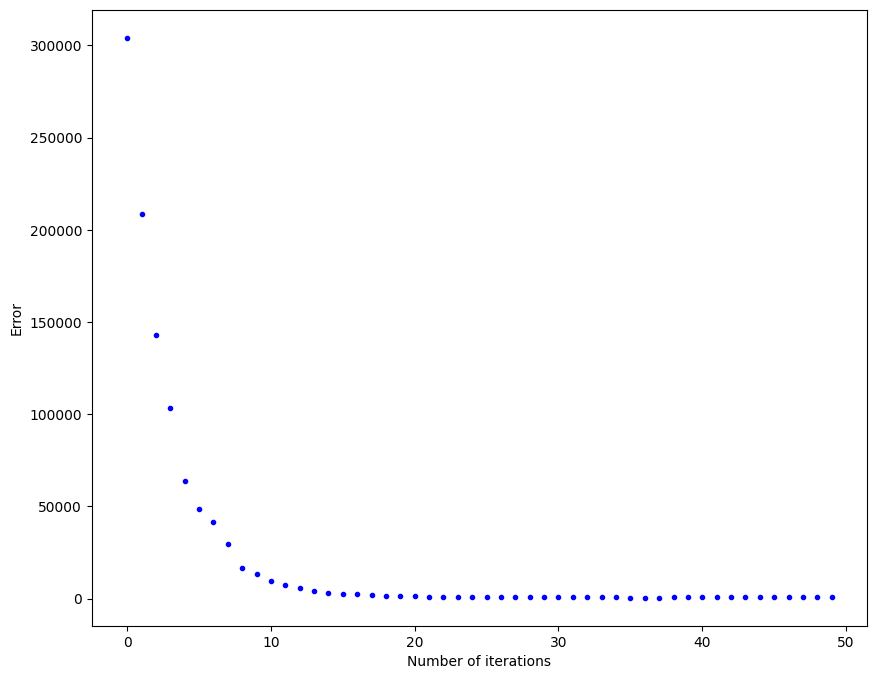

In [48]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [52]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [53]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 15.099
y_pred[1]: 18.005
Final error: 0.972


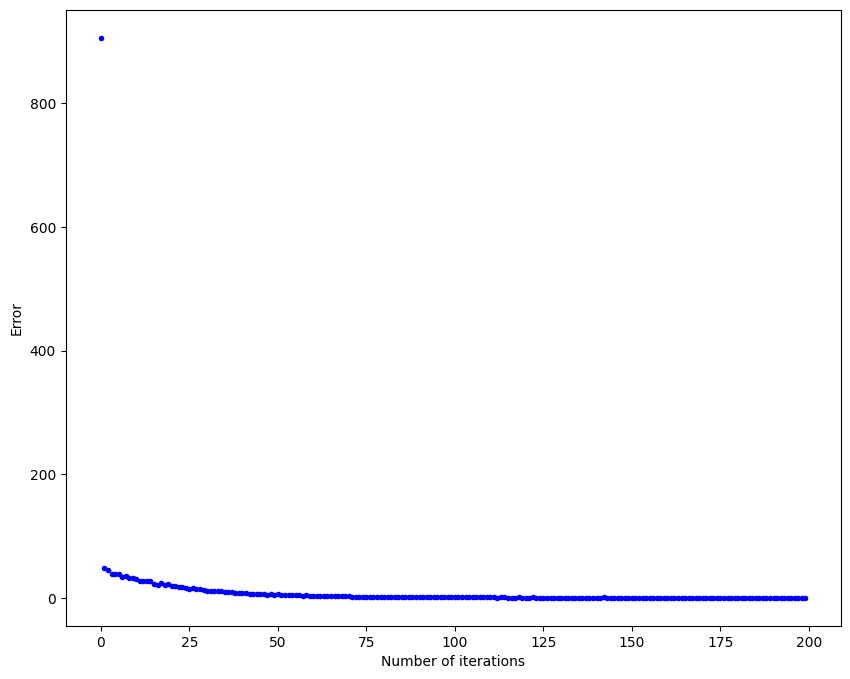

In [54]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [55]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.001, iterations=100000, batch_size=10):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [56]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 15.115
y_pred[1]: 18.037
Final error: 1.485


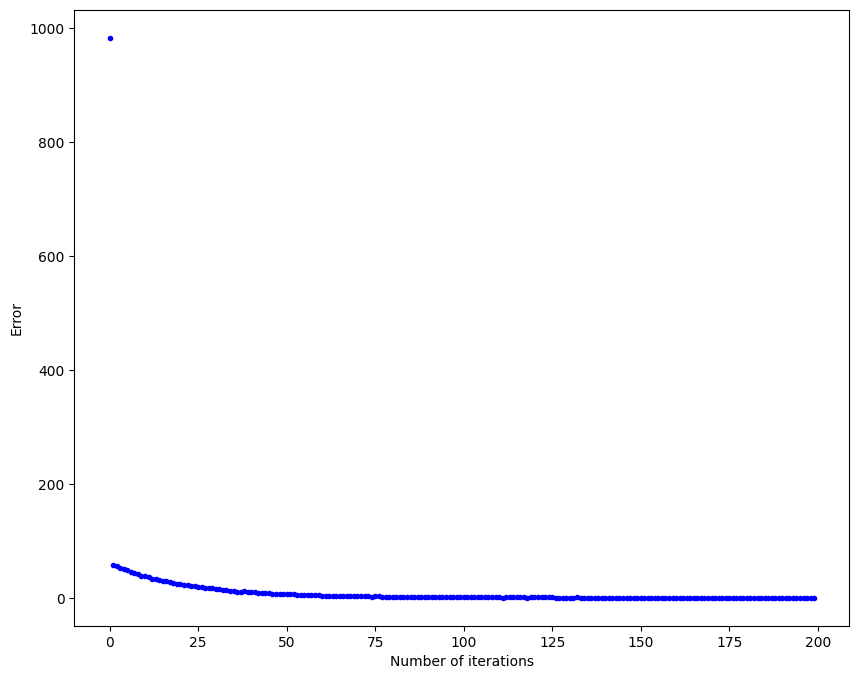

In [57]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

In [58]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=1e-5, iterations=10000, batch_size=100):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [59]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: -52587429113893583300461536701490476185762991651776505707467544439568728064.000
y_pred[1]: -339552635632159129228899068665953069131067192924233992556669653119622184960.000
Final error: 1961761219263361646461258188498566340137292511856741872290841732396958204803616349151986797340317641111216017988234416005533995183674690827227819409408.000


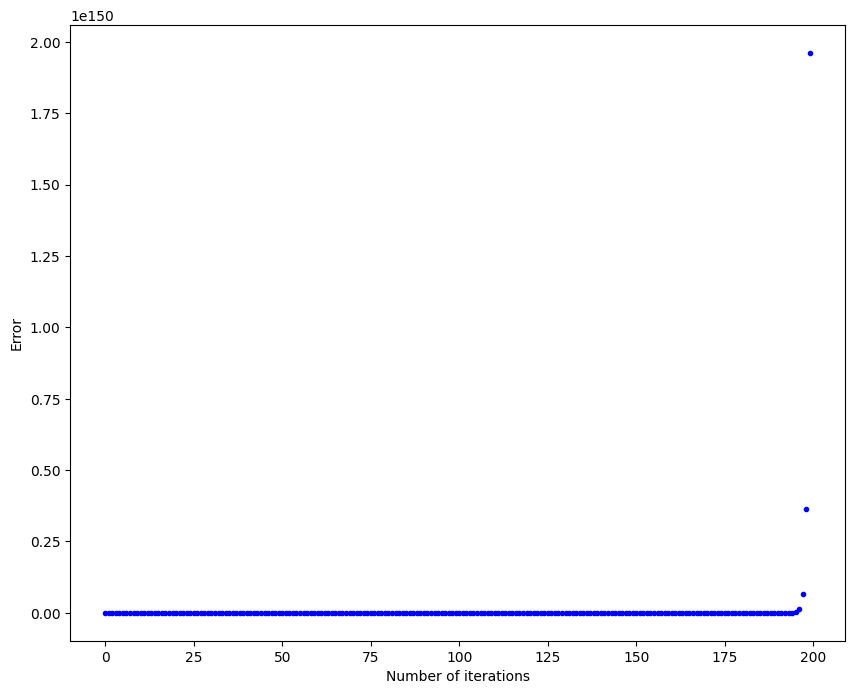

In [60]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 **(v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.**

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

# Using Diabetes Dataset

In [61]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X_new = diabetes.data
y_new = diabetes.target.reshape(-1, 1)

print("Shape of X_new:", X_new.shape)
print("Shape of y_new:", y_new.shape)

Shape of X_new: (442, 10)
Shape of y_new: (442, 1)


In [62]:
from sklearn.preprocessing import StandardScaler

# Scale the features in X_new
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Add a column of ones for the bias term
X_new_processed = np.c_[np.ones((len(X_new_scaled), 1)), X_new_scaled]

print("Shape of X_new_processed:", X_new_processed.shape)

Shape of X_new_processed: (442, 11)


In [63]:
# 1. Define learning rate and number of iterations
lr_bgd = 0.1
n_iter_bgd = 1000

# 2. Initialize y_pred (theta) vector
# The shape should be (number of features + 1, 1) for the bias term
y_pred_bgd = np.random.randn(X_new_processed.shape[1], 1)

# 3. Call the gradient_descent function
y_pred_bgd, cost_history_bgd, y_pred_history_bgd = gradient_descent(X_new_processed, y_new, y_pred_bgd, lr_bgd, n_iter_bgd)

# 4. Print the results (optional but helpful for verification)
print('Batch Gradient Descent Results:')
print('Final y_pred (theta):')
print(y_pred_bgd)
print('Final error: {:0.3f}'.format(cost_history_bgd[-1]))

Batch Gradient Descent Results:
Final y_pred (theta):
[[152.13348416]
 [ -0.40722853]
 [-11.32958203]
 [ 24.90072123]
 [ 15.36139357]
 [-22.69380906]
 [ 10.78455605]
 [ -1.89597253]
 [  6.50988009]
 [ 30.15034287]
 [  3.27178051]]
Final error: 1431.756


In [64]:
# 1. Define learning rate and number of iterations for SGD
lr_sgd = 0.001
n_iter_sgd = 10000

# 2. Initialize y_pred (theta) vector for SGD
# The shape should be (number of features + 1, 1) for the bias term
y_pred_sgd = np.random.randn(X_new_processed.shape[1], 1)

# 3. Call the stocashtic_gradient_descent function
# Note: The stocashtic_gradient_descent function expects X *with* the bias term added.
y_pred_sgd, cost_history_sgd = stocashtic_gradient_descent(X_new_processed, y_new, y_pred_sgd, lr_sgd, n_iter_sgd)

# 4. Print the results for verification
print('Stochastic Gradient Descent Results:')
print('Final y_pred (theta):')
print(y_pred_sgd)
print('Final error: {:0.3f}'.format(cost_history_sgd[-1]))

Stochastic Gradient Descent Results:
Final y_pred (theta):
[[152.1589493 ]
 [ -0.29957739]
 [-11.38459995]
 [ 25.01117061]
 [ 15.29963098]
 [ -4.57633787]
 [ -3.83572282]
 [ -9.66506312]
 [  4.80804726]
 [ 23.20715574]
 [  3.29838087]]
Final error: 574594.924


In [65]:
# 1. Define learning rate, number of iterations, and batch size for Mini-Batch Gradient Descent
lr_mbgd = 0.1
n_iter_mbgd = 200
batch_size_mbgd = 32

# 2. Initialize y_pred (theta) vector for Mini-Batch Gradient Descent
# The shape should be (number of features + 1, 1) for the bias term
y_pred_mbgd = np.random.randn(X_new_processed.shape[1], 1)

# 3. Call the minibatch_gradient_descent function
# Note: The minibatch_gradient_descent function expects X *without* the bias term added,
# as it adds it internally within the batch loop.
# We need to pass the original scaled X_new_scaled here.
y_pred_mbgd, cost_history_mbgd = minibatch_gradient_descent(X_new_scaled, y_new, y_pred_mbgd, lr_mbgd, n_iter_mbgd, batch_size_mbgd)

# 4. Store the returned final y_pred vector and the cost history
# These are already stored in y_pred_mbgd and cost_history_mbgd from the previous step.

# 5. Print the final y_pred vector and the final error
print('Mini-Batch Gradient Descent Results:')
print('Final y_pred (theta):')
print(y_pred_mbgd)
print('Final error: {:0.3f}'.format(cost_history_mbgd[-1]))

Mini-Batch Gradient Descent Results:
Final y_pred (theta):
[[152.14372804]
 [ -0.3119531 ]
 [-11.23557907]
 [ 25.12394315]
 [ 15.30320902]
 [ -6.21036002]
 [ -2.3410202 ]
 [ -9.15496311]
 [  4.63811561]
 [ 23.98030983]
 [  3.34616265]]
Final error: 20162.243


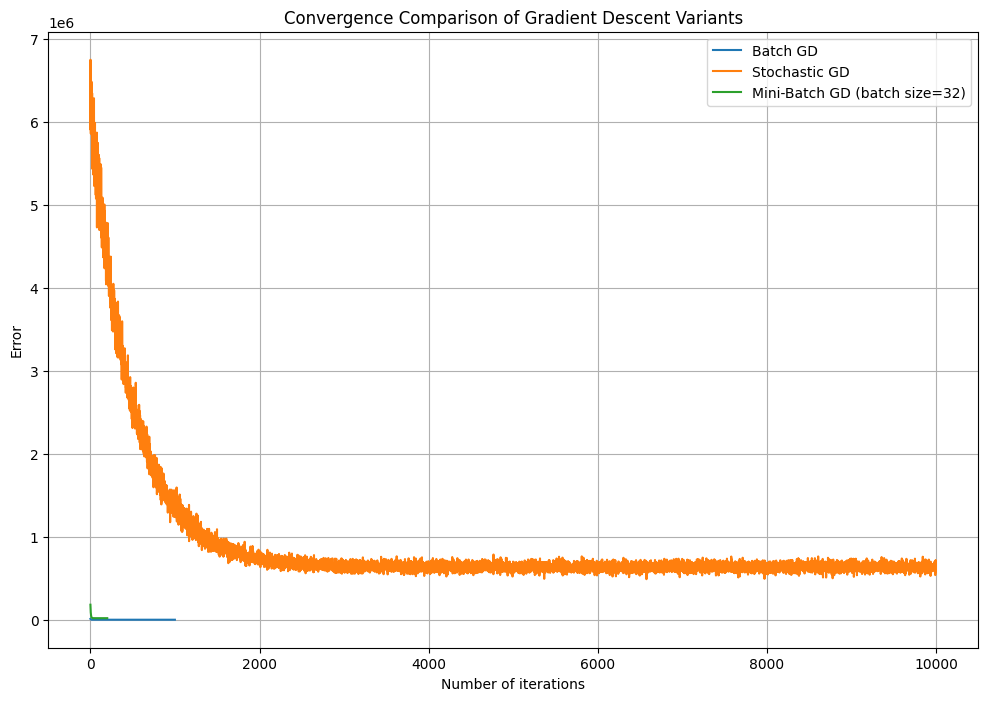

Final Error - Batch GD: 1431.756
Final Error - Stochastic GD: 574594.924
Final Error - Mini-Batch GD: 20162.243


In [66]:
plt.figure(figsize=(12, 8))
plt.plot(range(n_iter_bgd), cost_history_bgd, label='Batch GD')
plt.plot(range(n_iter_sgd), cost_history_sgd, label='Stochastic GD')
plt.plot(range(n_iter_mbgd), cost_history_mbgd, label=f'Mini-Batch GD (batch size={batch_size_mbgd})')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Convergence Comparison of Gradient Descent Variants')
plt.legend()
plt.grid(True)
plt.show()

print("Final Error - Batch GD: {:0.3f}".format(cost_history_bgd[-1]))
print("Final Error - Stochastic GD: {:0.3f}".format(cost_history_sgd[-1]))
print("Final Error - Mini-Batch GD: {:0.3f}".format(cost_history_mbgd[-1]))

## Summary:

### Data Analysis Key Findings

*   The diabetes dataset was successfully loaded, containing 442 samples and 10 features.
*   Features were successfully scaled using `StandardScaler`, and a bias term was added, resulting in a preprocessed matrix of shape (442, 11).
*   Batch Gradient Descent (BGD) was applied with a learning rate of 0.1 for 1000 iterations, achieving a final error of approximately 1431.756. BGD showed the smoothest convergence path.
*   Stochastic Gradient Descent (SGD) was applied with a learning rate of 0.001 for 10000 iterations, resulting in a final error of approximately 574594.924. SGD exhibited significant oscillations during convergence.
*   Mini-Batch Gradient Descent (MBGD) was applied with a learning rate of 0.1, 200 iterations, and a batch size of 32, yielding a final error of approximately 20162.243. MBGD's convergence path was more stable than SGD but less smooth than BGD.
*   Based on the specified parameters and number of iterations, Batch Gradient Descent achieved the lowest final error, followed by Mini-Batch Gradient Descent, while Stochastic Gradient Descent had the highest final error.

### Insights or Next Steps

*   The choice of learning rate and number of iterations significantly impacts the convergence and final error for each gradient descent variant. Further tuning of these hyperparameters is necessary for a more accurate comparison.
*   Investigate learning rate schedules (e.g., decreasing learning rate over time) for SGD to potentially reduce oscillations and improve convergence towards the minimum.
